# Child Well-being Risk Index


This index is to assess the risk to the well-being status of children around the world. 

The index covers the following list of countries: 'AFG', 'DZA', 'ARM', 'AZE', 'BGD', 'BEN', 'BRA', 'BFA', 'BDI',
       'KHM', 'CMR', 'TCD', 'CHL', 'COL', 'COD', 'COG', 'CRI', 'CIV',
       'DOM', 'ECU', 'EGY', 'SLV', 'ETH', 'GAB', 'GEO', 'GTM', 'HND',
       'IDN', 'JOR', 'KAZ', 'KGZ', 'MDG', 'MLI', 'MRT', 'MEX', 'MDA',
       'MNG', 'NIC', 'NER', 'MKD', 'PAK', 'PAN', 'PRY', 'PER', 'ROU',
       'SEN', 'SRB', 'LKA', 'THA', 'TGO', 'TTO', 'TUN', 'TUR', 'UGA',
       'UKR', 'URY', 'VNM', 'YEM'
       
       
       
      

In [13]:
import pandas as pd
from CWBR_index import make_index
from plots import pca_plot

## Data

In [14]:
df = (
    pd.read_csv('data/data.csv')
      .set_index(['ISO', 'Year'])
      .drop(columns=['Country'])
      .dropna()
)

df.head(5)

education_learning_poverty  education_school_out  \
ISO Year                                                     
AFG 1962                   93.447998             49.599998   
    1963                   93.447998             49.599998   
    1964                   93.447998             49.599998   
    1965                   93.447998             49.599998   
    1966                   93.447998             49.599998   

          health_immunization  health_mortality  labor_employment_total  \
ISO Year                                                                  
AFG 1962                 96.0             34.46                     9.3   
    1963                 96.0             33.87                     9.3   
    1964                 96.0             33.31                     9.3   
    1965                 96.0             32.76                     9.3   
    1966                 96.0             32.20                     9.3   

          labor_hour_total  nourishment_stunting  nourishment_underweight  
ISO Year                                                                   
AFG 1962              13.1                  53.2                     44.9  
    1963              13.1                  53.2                     44.9  
    1964              13.1                  53.2                     44.9  
    1965              13.1                  53.2                     44.9  
    1966              13.1                  53.2                     44.9

## The index

We perform Principal Components Analysis (PCA) on 8 indicators and adopt the first principal component as our index system. 

The lower the index, the lower the risk to children's well-being in a country. 


In [3]:
pipe, PC_df, X_proj, Variance_df = make_index(df)

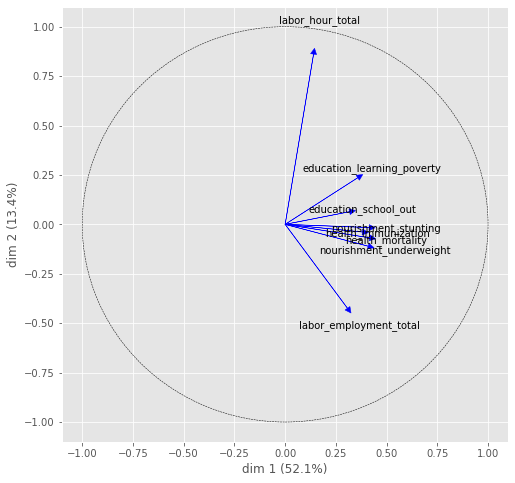

In [4]:
pca_plot(pipe['pca'], labels=df.columns, figsize=(8, 8))

## Vizualisations

In [ ]:
plot_df = X_proj.reset_index()
fig_scatter = px.scatter(plot_df, 
          x = 'Year',
          y = 'PC_1',
          color = 'ISO')
fig_line = px.line(plot_df, 
          x = 'Year',
          y = 'PC_1',
          color = 'ISO')
fig_scatter.add_traces(fig_line.data)

In [ ]:
X_proj.loc[:, :, [1970, 2014]].reset_index().pivot(index=['ISO', 'Country'], columns='Year', values='PC_1').shape

In [ ]:
X.corr()

In [ ]:
trend_df = X_proj.loc[:, :, [1981, 2019]].reset_index().pivot(index=['ISO', 'Country'], columns='Year', values='PC_1').rename(index={'Year': 'Index'}).reset_index().dropna()
trend_df['Difference'] = trend_df[2019]-trend_df[1981]
trend_df

In [ ]:
X_proj.reset_index().query("ISO == 'WLD'").plot(kind='line', x='Year', y='PC_1')

In [ ]:
X_proj.reset_index().ISO.unique()

In [ ]:
X_adj = X_proj.reset_index().merge(ISO_to_Everything(X_proj.reset_index()['ISO']).drop_duplicates().reset_index(), on = 'ISO')#[['Continent', 'IncomeLevel']].index.unique()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(data=X_adj, x='PC_1', y='PC_2', hue='IncomeLevel', ax=ax1)
sns.scatterplot(data=PC_df.reset_index(), x='PC_1', y='PC_2', hue='Variable', ax=ax2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(data=X_adj.query('Year == 2017'), x='PC_1', y='PC_2', hue='IncomeLevel', ax=ax1)
sns.scatterplot(data=PC_df.reset_index(), x='PC_1', y='PC_2', hue='Variable', ax=ax2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(data=X_adj.query('Year >1980'), x='Year', y='PC_1', hue='IncomeLevel', ax=ax1)
sns.scatterplot(data=X_adj.query('Year >1980'), x='Year', y='PC_1', hue='ISO', ax=ax2)

In [ ]:
X.corr()

In [ ]:

# variables = ['health_immunization', 'health_mortality', 'health_stunting', 'health_malnutrition']
# b_columns = ['Country', 'ISO', 'Year']
# a = result_df.loc[:, variables].values
# b = result_df.loc[:,b_columns].values

# a = StandardScaler().fit_transform(a)
# b

In [ ]:

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(a)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

In [ ]:
indexDf = pd.DataFrame(data = b, columns = ['Country', 'ISO', 'Year'])
finalDf = pd.concat([principalDf, indexDf], axis = 1)
finalDf['Index'] = finalDf['Country']+finalDf['ISO']+str(finalDf.Year)
str(finalDf['Year'])
finalDf[['Country', 'ISO','Year']]
finalDf

In [ ]:
weights = pca.components_
#weights[0][0]+weights[0][1]+weights[0][2]+weights[0][3]
sum(weights[0])

In [ ]:
finalDf.ISO.unique()

In [ ]:
plot_df = finalDf
fig_scatter = px.scatter(plot_df, 
          x = 'principal component 1',
          y = 'principal component 2',
          color = 'Variable')
fig_line = px.line(plot_df, 
          x = 'principal component 1',
          y = 'principal component 2',
          color = 'Variable')
fig_scatter.add_traces(fig_line.data)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ISOs = ['AFG', 'AFE', 'AFW', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARB',
       'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CSS',
       'CAF', 'CEB', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA',
       'DOM', 'EAR', 'EAS', 'TEA', 'EAP', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'EMU', 'ECS', 'TEC', 'ECA', 'EUU',
       'FJI', 'FIN', 'FCS', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HPC', 'HND',
       'HUN', 'IBD', 'IBT', 'IDB', 'IDX', 'IDA', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
       'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LTE',
       'LCN', 'LAC', 'TLA', 'LVA', 'LDC', 'LBN', 'LSO', 'LBR', 'LBY',
       'LTU', 'LMY', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MEA', 'TMN', 'MNA', 'MIC',
       'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU',
       'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NAC', 'MKD', 'NOR',
       'OED', 'OMN', 'OSS', 'PSS', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY',
       'PER', 'PHL', 'POL', 'PRT', 'PST', 'PRE', 'QAT', 'ROU', 'RUS',
       'RWA', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE',
       'SGP', 'SVK', 'SVN', 'SST', 'SLB', 'SOM', 'ZAF', 'SAS', 'TSA',
       'SSD', 'ESP', 'LKA', 'KNA', 'LCA', 'VCT', 'SSF', 'TSS', 'SSA',
       'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA', 'TLS',
       'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV', 'UGA', 'UKR',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'PSE',
       'WLD', 'YEM', 'ZMB', 'ZWE']
#color = 
for ISO, color in zip(ISOs, colors):
    indicesToKeep = finalDf['ISO'] == ISO
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = [color]
               , s = 50)
    ax.legend(ISOs)
    ax.grid()

In [ ]:
pca.explained_variance_ratio_